##Working of the project

*   First we encode the category class using LabelEncoder
*   Then we clean the message column. We remove all HTML elements using BeautifulSoup, then we remove all the symbols, punctuation marks and stop words (and is the if) because they just help to make sentences, but do not play any role in its meaning. We also stem each word, i.e. reduce each word to its simplest form - ex: play, playing, plays, played get all converted to same word, because they all signify same meaning. This helps us to get rid of tenses and other factors that affect words. (In this dataset, the most occuring words in spam as well as not spam are almost same, this causes confusion for our model)
*   Then for vecotization, we compare between Count vectorizer and TfIdf vectorizer, for algorithm we use Naive Bayes. It turns out that TfIdf along with MultinomialNB produces best accuracy and preicision, hence we choose it
*   In this project, precision is more important to us than accuracy, because we want to minimise the false positives, i.e. minimise the number of times when not spam would be classified as spam, because this would lead to a user missing out on important emails!







In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Email_Dataset.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.sample(10)

,CATEGORY,MESSAGE
3865,Not Spam,-----BEGIN PGP SIGNED MESSAGE-----\n\nHash: SH...
1125,Not Spam,I finally let go of my Irix Magic desktop and ...
2767,Not Spam,"Mark Derricutt wrote:\n\n> Hiya, I just myself..."
2420,Not Spam,\n\n\n\ncwg-dated-1030817858.a49b7e@DeepEddy.C...
2632,Not Spam,When a settler goes postal and kills some Pale...
1449,Not Spam,"On Mon, 2002-10-07 at 11:54, Matthias Saou wro..."
2737,Not Spam,"Well, for one, it would free up the similar la..."
3886,Not Spam,"On Tue, Aug 13, 2002 at 12:48:18AM +0100, wint..."
103,Spam,<html>\n\n<head>\n\n<title>Foreclosure Toolkit...
117,Spam,"\n\nDear Consumers, Increase your Business Sal..."


In [ ]:
!pip install bs4

In [ ]:
# Cleaning the message (removing html elements)
from bs4 import BeautifulSoup

def remove_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  op = soup.get_text()
  op = op.replace("\n\n\n\n", " ")
  op = op.replace("\n", "")
  return op

df['Edited_Message'] = df['MESSAGE'].apply(remove_html)
df.head()


<ipython-input-257-17f21382f0db>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')
<ipython-input-257-17f21382f0db>:5: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,CATEGORY,MESSAGE,Edited_Message
0,Spam,\n\nThe Internet's Online Pharmacy\n\n\n\nViag...,The Internet's Online Pharmacy Viagra - Xenica...
1,Spam,------=_NextPart_000_00B0_35C58D0E.D7267B06\n\...,------=_NextPart_000_00B0_35C58D0E.D7267B06Con...
2,Spam,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",Earn High Commissions for Booking Online NOR...
3,Spam,------=_NextPart_000_00E4_86E61E0A.B5488E11\n\...,------=_NextPart_000_00E4_86E61E0A.B5488E11Con...
4,Spam,BARRISTER ADEWALE COKER CHAMBERS\n\nLegal Prac...,BARRISTER ADEWALE COKER CHAMBERSLegal Practiti...


In [ ]:
# Encoding category
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['CATEGORY'] = encoder.fit_transform(df['CATEGORY'])
df.head()

,CATEGORY,MESSAGE,Edited_Message
0,1,\n\nThe Internet's Online Pharmacy\n\n\n\nViag...,The Internet's Online Pharmacy Viagra - Xenica...
1,1,------=_NextPart_000_00B0_35C58D0E.D7267B06\n\...,------=_NextPart_000_00B0_35C58D0E.D7267B06Con...
2,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",Earn High Commissions for Booking Online NOR...
3,1,------=_NextPart_000_00E4_86E61E0A.B5488E11\n\...,------=_NextPart_000_00E4_86E61E0A.B5488E11Con...
4,1,BARRISTER ADEWALE COKER CHAMBERS\n\nLegal Prac...,BARRISTER ADEWALE COKER CHAMBERSLegal Practiti...


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(3916, 3)

In [ ]:
df['CATEGORY'].value_counts()
# 1 == span

CATEGORY
0    3075
1     841
Name: count, dtype: int64

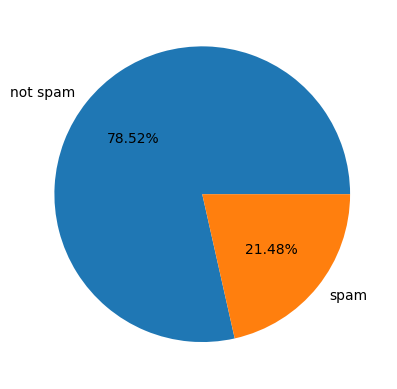

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['CATEGORY'].value_counts(), labels=["not spam", "spam"], autopct="%0.2f%%")
plt.show()

##EDA

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##Data Preprocessing

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.word_tokenize("Hi, how are you! There's him!")

['Hi', ',', 'how', 'are', 'you', '!', 'There', "'s", 'him', '!']

In [ ]:
# Remove special chars, remove stopwords (and, it, etc), remove punctuations
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    # Text is now converted into a list
    # Run loop to remove special chars
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)

transform_text("Hi Hello's, How are you? I think you are 2 beautiful!!")

'hi hello think 2 beauti'

In [ ]:
df['transformed_msg'] = df['Edited_Message'].apply(transform_text)
df.head()

,CATEGORY,MESSAGE,Edited_Message,transformed_msg
0,1,\n\nThe Internet's Online Pharmacy\n\n\n\nViag...,The Internet's Online Pharmacy Viagra - Xenica...,internet onlin pharmaci viagra xenic propecia ...
1,1,------=_NextPart_000_00B0_35C58D0E.D7267B06\n\...,------=_NextPart_000_00B0_35C58D0E.D7267B06Con...,base64
2,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",Earn High Commissions for Booking Online NOR...,earn high commiss book onlin northstar travel ...
3,1,------=_NextPart_000_00E4_86E61E0A.B5488E11\n\...,------=_NextPart_000_00E4_86E61E0A.B5488E11Con...,base64
4,1,BARRISTER ADEWALE COKER CHAMBERS\n\nLegal Prac...,BARRISTER ADEWALE COKER CHAMBERSLegal Practiti...,barrist adewal coker chambersleg practition no...


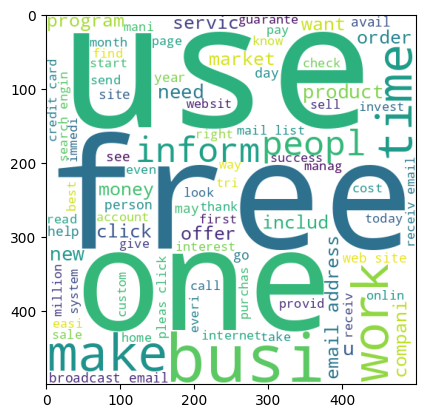

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

spam_wc = wc.generate(df[df["CATEGORY"] == 1]['transformed_msg'].str.cat(sep=" "))
plt.imshow(spam_wc)
# We get to see the most used words in spam messages (like free, offer, usr, etc)

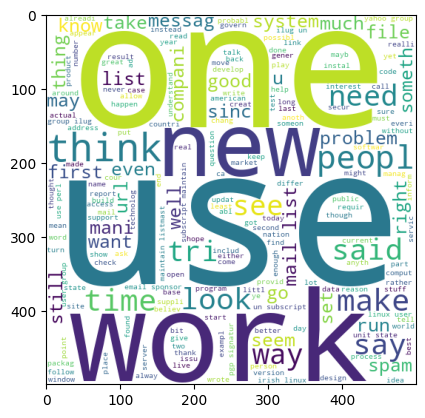

In [ ]:
not_spam_wc = wc.generate(df[df["CATEGORY"] == 0]['transformed_msg'].str.cat(sep=" "))
plt.imshow(not_spam_wc)
# Both have use and one as most frequently used (This could be a problem)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [ ]:
df.head()

,CATEGORY,MESSAGE,Edited_Message,transformed_msg
0,1,\n\nThe Internet's Online Pharmacy\n\n\n\nViag...,The Internet's Online Pharmacy Viagra - Xenica...,internet onlin pharmaci viagra xenic propecia ...
1,1,------=_NextPart_000_00B0_35C58D0E.D7267B06\n\...,------=_NextPart_000_00B0_35C58D0E.D7267B06Con...,base64
2,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",Earn High Commissions for Booking Online NOR...,earn high commiss book onlin northstar travel ...
3,1,------=_NextPart_000_00E4_86E61E0A.B5488E11\n\...,------=_NextPart_000_00E4_86E61E0A.B5488E11Con...,base64
4,1,BARRISTER ADEWALE COKER CHAMBERS\n\nLegal Prac...,BARRISTER ADEWALE COKER CHAMBERSLegal Practiti...,barrist adewal coker chambersleg practition no...


In [ ]:
# Let's use bag of words first
x = cv.fit_transform(df['transformed_msg']).toarray()
y = df['CATEGORY'].values

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# Training gnb

gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

# Precision score is very important in such models. It tells us how many false positives were encountered.
# i.e. how many times it was not a spam but classified as spam! This is very important to our model

0.9221938775510204
[[592  21]
 [ 40 131]]
0.8618421052631579


In [ ]:
# Training mnb
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9795918367346939
[[603  10]
 [  6 165]]
0.9428571428571428


In [ ]:
# training bnb
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8571428571428571
[[589  24]
 [ 88  83]]
0.7757009345794392


In [ ]:
# Now instead of using bag of words (count vectorizer) let's use tfidf

tfidf = TfidfVectorizer(max_features=1000)
x1 = tfidf.fit_transform(df['transformed_msg']).toarray()

In [ ]:
# Lets split again

x1_train, x1_test, ytf_train, ytf_test = train_test_split(x1, y, test_size=0.2, random_state=2)

In [ ]:
gnb.fit(x1_train, ytf_train)
ytf_pred1 = gnb.predict(x1_test)
print(accuracy_score(ytf_test, ytf_pred1))
print(confusion_matrix(ytf_test, ytf_pred1))
print(precision_score(ytf_test, ytf_pred1))

0.9387755102040817
[[578  35]
 [ 13 158]]
0.8186528497409327


In [ ]:
mnb.fit(x1_train, ytf_train)
ytf_pred2 = mnb.predict(x1_test)
print(accuracy_score(ytf_test, ytf_pred2))
print(confusion_matrix(ytf_test, ytf_pred2))
print(precision_score(ytf_test, ytf_pred2))
# Excellent accuracy as well as precision
# 97 96

0.9757653061224489
[[607   6]
 [ 13 158]]
0.9634146341463414


In [ ]:
bnb.fit(x1_train, ytf_train)
ytf_pred3 = bnb.predict(x1_test)
print(accuracy_score(ytf_test, ytf_pred3))
print(confusion_matrix(ytf_test, ytf_pred3))
print(precision_score(ytf_test, ytf_pred3))

0.9221938775510204
[[588  25]
 [ 36 135]]
0.84375


In [ ]:
# Since precision matters more, we'll go with multinomial naive bayes (mnb) => tfidf mnb

##Putting in test csv file


In [ ]:
df2 = pd.read_csv('/content/Email Test Data.csv')
df2.head()

,Unnamed: 0,MESSAGE
0,0,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,2,This is a multi-part message in MIME format.\n...
3,3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,4,This is the bottom line. If you can GIVE AWAY...


In [ ]:
# First we will have to remove html and then apply transform_text
df2['Edited_Message'] = df2['MESSAGE'].apply(remove_html)
df2['transformed_msg'] = df2['Edited_Message'].apply(transform_text)
df2.head()

<ipython-input-257-17f21382f0db>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,Unnamed: 0,MESSAGE,Edited_Message,transformed_msg
0,0,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner, Interest Rates are at their lo...",dear homeown interest rate lowest point 40 yea...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attent must comput user packag deal norton sys...
2,2,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format. -...,messag mime format dare tri find better annuit...
3,3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION: The new domain names ar...,import inform new domain name final avail gene...
4,4,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cd free peopl like one m...


In [ ]:
# Use tfidf on df2['transformed_msg']
x_test_data = tfidf.fit_transform(df2['transformed_msg']).toarray()

In [ ]:
df2['CATEGORY'] = mnb.predict(x_test_data)
df2['CATEGORY'] = encoder.inverse_transform(df2['CATEGORY'])
df2.head()

,Unnamed: 0,MESSAGE,Edited_Message,transformed_msg,CATEGORY
0,0,"Dear Homeowner,\n\n \n\nInterest Rates are at ...","Dear Homeowner, Interest Rates are at their lo...",dear homeown interest rate lowest point 40 yea...,Not Spam
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION: This is a MUST for ALL Computer Use...,attent must comput user packag deal norton sys...,Not Spam
2,2,This is a multi-part message in MIME format.\n...,This is a multi-part message in MIME format. -...,messag mime format dare tri find better annuit...,Not Spam
3,3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION: The new domain names ar...,import inform new domain name final avail gene...,Not Spam
4,4,This is the bottom line. If you can GIVE AWAY...,This is the bottom line. If you can GIVE AWAY...,bottom line give away cd free peopl like one m...,Not Spam


In [ ]:
df2.drop(columns=['Edited_Message', 'transformed_msg'], inplace=True)
df2.head()

,Unnamed: 0,MESSAGE,CATEGORY
0,0,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",Not Spam
1,1,ATTENTION: This is a MUST for ALL Computer Use...,Not Spam
2,2,This is a multi-part message in MIME format.\n...,Not Spam
3,3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,Not Spam
4,4,This is the bottom line. If you can GIVE AWAY...,Not Spam


In [ ]:
df2['CATEGORY'].value_counts()

CATEGORY
Not Spam    955
Spam         45
Name: count, dtype: int64

In [ ]:
df2.to_csv('Q7_final.csv')